<h1> Most Teams Played on by a NFL Player </h1>

<p> Often in sports it is glorified when a player stays with a single organization for majority if not the entirety of thier career. However, some players do not get to experience that feeling. The purpose of this notebook is to explore the NFL players who played on the most teams dating from 1999 to 2023. </p>

In [1]:
import nfl_data_py as nfl
import pandas as pd
import matplotlib.pyplot as plt

<p> import the roasters of every NFL from 199 to 2023 </p>

In [5]:
all_years = nfl.import_seasonal_rosters(
[1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]
)
all_years.head()

,season,team,position,depth_chart_position,jersey_number,status,player_name,first_name,last_name,birth_date,...,entry_year,rookie_year,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number,age
0,1999,CLE,RB,RB,27,ACT,Abdul-Karim al-Jabbar,Abdul-Karim,al-Jabbar,1974-06-28,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,25.0
1,1999,MIA,RB,RB,33,TRD,Abdul-Karim al-Jabbar,Abdul-Karim,al-Jabbar,1974-06-28,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,25.0
2,1999,TB,RB,RB,27,RES,Rabih Abdullah,Rabih,Abdullah,1975-04-27,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,24.0
3,1999,CLE,LB,OLB,55,ACT,Rahim Abdullah,Rahim,Abdullah,1976-03-22,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,23.0
4,1999,TB,DB,CB,21,ACT,Donnie Abraham,Nathaniel,Abraham,1973-10-08,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,25.0


<p> Filter the dataframe to use the players birth date and the players name as a unique indeitfying key , then find the top five players that have played on the most NFL teams </p>

In [28]:
player_teams_count = all_years.groupby(['birth_date', 'player_name'])['team'].nunique().reset_index()
player_teams_count.nlargest(5, 'team')

,birth_date,player_name,team
2619,1977-12-09,Shayne Graham,11
3268,1979-07-04,Josh McCown,11
5923,1986-05-15,Josh Johnson,11
3629,1980-05-24,Jason Babin,9
4600,1982-11-24,Ryan Fitzpatrick,9


<p> Shane Graham, Josh McCown, and Josh Johnson each have played for 11 different NFL team during the course of their career so I made a seperate dataframe for each. </p>

In [34]:
SG = all_years[(all_years['player_name']=='Shayne Graham') & (all_years['birth_date']=='1977-12-09')]
JM = all_years[(all_years['player_name']=='Josh McCown') & (all_years['birth_date']=='1979-07-04')]
JJ = all_years[(all_years['player_name']=='Josh Johnson') & (all_years['birth_date']=='1986-05-15')]
SG.head()

,season,team,position,depth_chart_position,jersey_number,status,player_name,first_name,last_name,birth_date,...,entry_year,rookie_year,draft_club,ngs_position,week,game_type,status_description_abbr,football_name,draft_number,age
1491,2001,BUF,SPEC,K,17,ACT,Shayne Graham,Michael,Graham,1977-12-09,...,NaN,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,23.0
1208,2002,CAR,K,None,11,ACT,Shayne Graham,Shayne,Graham,1977-12-09,...,2000.0,2000.0,None,None,17.0,REG,A01,Shayne,None,24.0
977,2003,CIN,K,None,17,ACT,Shayne Graham,Shayne,Graham,1977-12-09,...,2000.0,2000.0,None,None,17.0,REG,A01,Shayne,None,25.0
768,2004,CIN,K,None,17,ACT,Shayne Graham,Shayne,Graham,1977-12-09,...,2000.0,2000.0,None,None,17.0,REG,A01,Shayne,None,26.0
605,2005,CIN,K,None,17,ACT,Shayne Graham,Shayne,Graham,1977-12-09,...,2000.0,2000.0,None,None,18.0,WC,A01,Shayne,None,27.0


In [15]:
from datetime import datetime
import numpy as np
import matplotlib.dates as mdates

<p> Below are all the timelines for each respective player </p>

In [64]:
JJ_dates = JJ['season']
JJ_teams = JJ['team']
JJ_ticks = np.tile([-5, 5, -3, 3, -1, 1],int(np.ceil(len(JJ_dates)/6)))[:len(JJ_dates)]
SG_dates = SG['season']
SG_teams = SG['team']
SG_ticks = np.tile([-5, 5, -3, 3, -1, 1],int(np.ceil(len(SG_dates)/6)))[:len(SG_dates)]
JM_dates = JM['season']
JM_teams = JM['team']
JM_ticks = np.tile([-5, 5, -3, 3, -1, 1],int(np.ceil(len(JM_dates)/6)))[:len(JM_dates)]

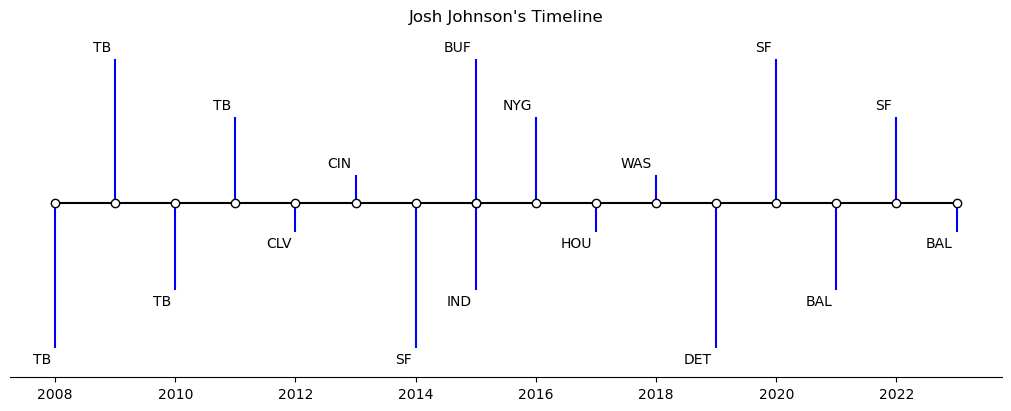

In [72]:
fig, ax = plt.subplots(figsize=(10,4), layout='constrained')
ax.set(title="Josh Johnson's Timeline")
ax.vlines(JJ_dates, 0 ,JJ_ticks, color='blue')
ax.plot(JJ_dates, np.zeros_like(JJ_dates), "-o",color="k", markerfacecolor="w")
ax.set_xticks(np.arange(min(JJ_dates), max(JJ_dates) + 1, 2))


for d, l, r in zip(JJ_dates, JJ_ticks, JJ_teams):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.margins(y=0.1)
plt.show()

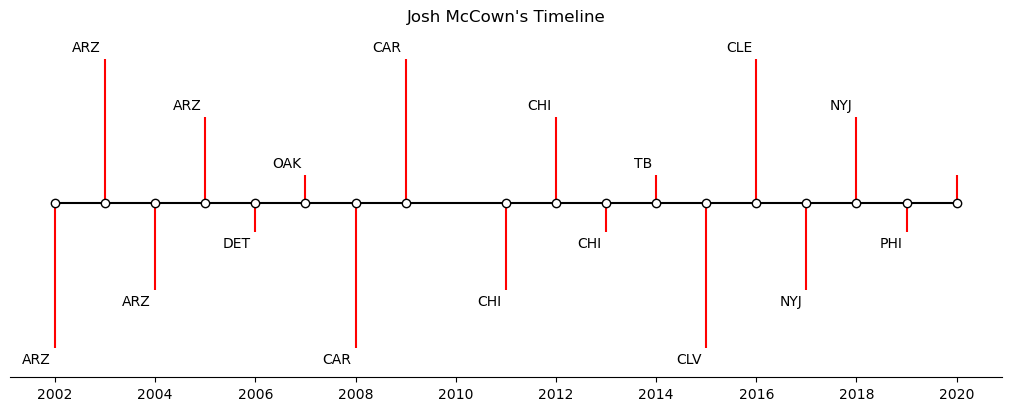

In [74]:
fig, ax = plt.subplots(figsize=(10,4), layout='constrained')
ax.set(title="Josh McCown's Timeline")
ax.vlines(JM_dates, 0 ,JM_ticks, color='red')
ax.plot(JM_dates, np.zeros_like(JM_dates), "-o",color="k", markerfacecolor="w")
ax.set_xticks(np.arange(min(JM_dates), max(JM_dates) + 1, 2))


for d, l, r in zip(JM_dates, ticks, JM_teams):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.margins(y=0.1)
plt.show()

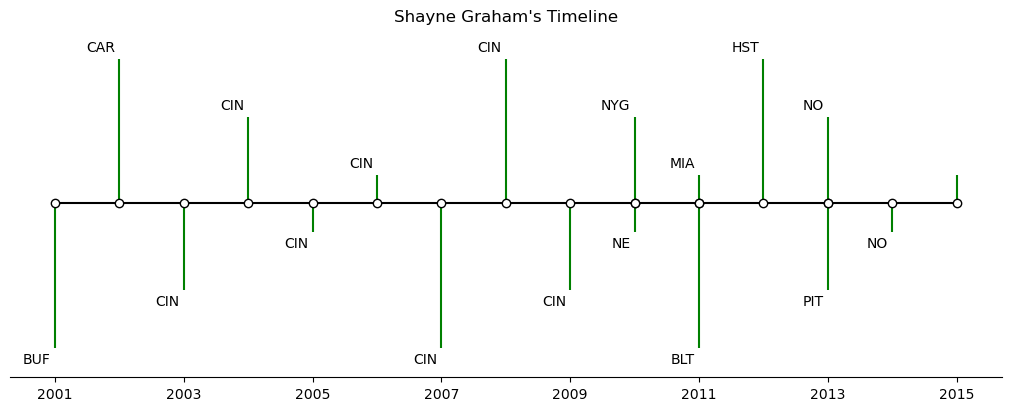

In [75]:
fig, ax = plt.subplots(figsize=(10,4), layout='constrained')
ax.set(title="Shayne Graham's Timeline")
ax.vlines(SG_dates, 0 ,SG_ticks, color='green')
ax.plot(SG_dates, np.zeros_like(SG_dates), "-o",color="k", markerfacecolor="w")
ax.set_xticks(np.arange(min(SG_dates), max(SG_dates) + 1, 2))


for d, l, r in zip(SG_dates, ticks, SG_teams):
    ax.annotate(r, xy=(d, l),
                xytext=(-3, np.sign(l)*3), textcoords="offset points",
                horizontalalignment="right",
                verticalalignment="bottom" if l > 0 else "top")

ax.yaxis.set_visible(False)
ax.spines[["left", "top", "right"]].set_visible(False)
ax.margins(y=0.1)
plt.show()

<p> If you want to learn more about creating a timeline with matplotlib you can find the tutorial <a href="https://matplotlib.org/stable/gallery/lines_bars_and_markers/timeline.html#sphx-glr-gallery-lines-bars-and-markers-timeline-py" > here </a>